<a href="https://colab.research.google.com/github/perkdrew/literary_analysis/blob/master/literary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess
from gensim import corpora, models
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt')

from google.colab import drive
drive.mount('/content/gdrive')

# **Topic Modeling**

In [10]:
gutenbergDir = "/content/gdrive/My Drive/Colab Notebooks/Data/digiphil/gutenberg/"
for filename in os.listdir(gutenbergDir):
    with open(os.path.join(gutenbergDir, filename), "r") as files:
      if filename.startswith("Albert Einstein"):
        einstein_text = files.readlines()
      elif filename.startswith("Charles Darwin"):
        darwin_text = files.readlines()
      elif filename.startswith("Herbert George"):
        wells_text = files.readlines()
      elif filename.startswith("Isaac Asimov"):
        asimov_text = files.readlines()
      elif filename.startswith("Philip Kindred"):
        pkd_text = files.readlines() 
      else:
        if filename.startswith("Thomas Henry"):
          thomas_text = files.readlines() 

def preprocess_file(text):
  "\n".join(text)
  lemmatizer = WordNetLemmatizer()
  text = simple_preprocess(str(text))
  text = [remove_stopwords(word) for word in text]
  text = [lemmatizer.lemmatize(word, pos="n") for word in text]
  text = [lemmatizer.lemmatize(word, pos="v") for word in text]
  return text

## All the docs
nested_list_of_tokens=[]
# Einstein text
ein_tok = preprocess_file(einstein_text)
nested_list_of_tokens.append(ein_tok)
# Darwin text
dar_tok = preprocess_file(darwin_text)
nested_list_of_tokens.append(dar_tok)
# Wells text
wells_tok = preprocess_file(wells_text)
nested_list_of_tokens.append(wells_tok)
# Asimov text
asi_tok = preprocess_file(asimov_text)
nested_list_of_tokens.append(asi_tok)
# PKD text
pkd_tok = preprocess_file(pkd_text)
nested_list_of_tokens.append(pkd_tok)
# T.Huxley text
thom_tok = preprocess_file(thomas_text)
nested_list_of_tokens.append(thom_tok)

## Feature extraction
dictionary_LDA = corpora.Dictionary(nested_list_of_tokens)
bow_corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in nested_list_of_tokens]
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

# Topic modeling
num_topics=5
%time lda_model_tfidf = models.LdaModel(tfidf_corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, update_every=2,\
                                  passes=1, chunksize=50, alpha="auto", \
                                  eta=[0.01]*len(dictionary_LDA.keys()), \
                                  random_state=41)

CPU times: user 215 ms, sys: 95.3 ms, total: 310 ms
Wall time: 192 ms


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:807: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [11]:
lda_model_tfidf.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

[(0,
  [('harris', 0.003630762),
   ('redwood', 0.0036058102),
   ('bensington', 0.0022148709),
   ('cossar', 0.0021446343),
   ('skinner', 0.0013430517),
   ('piper', 0.001216248),
   ('westerburg', 0.0010907747),
   ('caterham', 0.000899641),
   ('garrison', 0.00082664343),
   ('lava', 0.00079886016)]),
 (1,
  [('geometry', 0.0041805715),
   ('relativity', 0.003132599),
   ('euclidean', 0.0027413706),
   ('electromagnetic', 0.0026438395),
   ('ether', 0.002636333),
   ('disc', 0.0023166097),
   ('plane', 0.0017791261),
   ('finite', 0.0017622294),
   ('spherical', 0.0016579224),
   ('disposition', 0.0015657556)]),
 (2,
  [('gladstone', 0.0017276638),
   ('redwood', 0.0017073068),
   ('bensington', 0.0013053413),
   ('genesis', 0.0010551908),
   ('cossar', 0.00075864187),
   ('nebular', 0.0006901716),
   ('mr', 0.000650366),
   ('writer', 0.0006220858),
   ('skinner', 0.0006191294),
   ('scientific', 0.0005790513)]),
 (3,
  [('harris', 0.0037444388),
   ('lava', 0.0028389164),
   ('vo

In [0]:
! pip install pyLDAvis

In [0]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_tfidf, corpus=tfidf_corpus, dictionary=dictionary_LDA, mds="mmds")
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

# **Word Embeddings**

In [12]:
## Word2Vec
# Train model
word2vec = models.Word2Vec(nested_list_of_tokens, min_count=1)
# summarize the loaded model
print(word2vec)
# summarize vocabulary
words = list(word2vec.wv.vocab)
print(words)
# save model
word2vec.save('word2vec.bin')

Word2Vec(vocab=8882, size=100, alpha=0.025)
['sidelight', '', 'relativity', 'albert', 'einstein', 'content', 'ether', 'theory', 'address', 'deliver', 'th', 'university', 'leyden', 'geometry', 'experience', 'expand', 'form', 'prussian', 'academy', 'science', 'berlin', 'january', 'come', 'alongside', 'idea', 'ponderable', 'matter', 'derive', 'abstraction', 'everyday', 'life', 'physicist', 'set', 'existence', 'kind', 'explanation', 'probably', 'seek', 'phenomenon', 'give', 'rise', 'action', 'distance', 'property', 'light', 'lead', 'undulatory', 'let', 'devote', 'little', 'consideration', 'subject', 'outside', 'physic', 'know', 'try', 'connect', 'cause', 'effect', 'natural', 'object', 'afford', 'mutual', 'immediate', 'contact', 'communication', 'motion', 'impact', 'push', 'pull', 'heat', 'induce', 'combustion', 'mean', 'flame', 'true', 'weight', 'sense', 'play', 'important', 'daily', 'body', 'meet', 'constant', 'link', 'variable', 'time', 'place', 'speculate', 'gravity', 'conscious', 'char

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


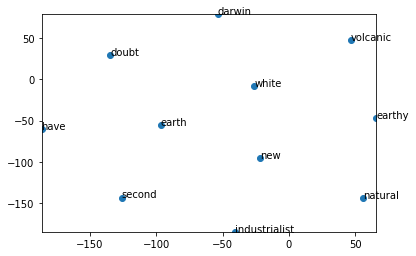

In [13]:
def display_closestwords_tsnescatterplot(model, word):
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]
    # Get closely related words
    close_words = model.similar_by_word(word)
    # Add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    # Find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0, init="pca")
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # Display scatter plot
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

display_closestwords_tsnescatterplot(word2vec, "darwin")